Importing required libraries


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

 Reading the data set and checking first 5 records
 

In [6]:
stu_data=pd.read_csv("studentsperf.csv")
stu_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the data set

In [7]:
stu_data.shape

(1000, 8)

there are 1000 rows and 8 columns

checking for missing values

In [8]:
stu_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

there are no null values in the data set

checking for duplicates

In [9]:
stu_data.duplicated().sum()

0

there are no duplicates in the data set

checking columns and its data types

In [10]:
stu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


categorical columns are ==>gender ,race/ethnicity,parental level of education,lunch ,test preparation course
numerical columns==>math score,reading score,writing score

Checking for no of unique values in each column

In [11]:
stu_data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Checking for the descriptive statistics

In [12]:
stu_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


means of above columns are close to each other and in between 66.08 and 69.169
stanadard deviations are in between 14.60 and 15.19

Defining numerical and categorical columns

In [13]:
num_col=num_col = stu_data.select_dtypes(include=['number']).columns.tolist()
cat_col = stu_data.select_dtypes(exclude=['number']).columns.tolist()
print("numerical col==>",num_col)
print("categorical col==>",cat_col)

numerical col==> ['math score', 'reading score', 'writing score']
categorical col==> ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
for col in cat_col:
  print(stu_data[col].value_counts())
  print("="*50)

gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course
none         642
completed    358
Name: count, dtype: int64


Calculating total score and average score

In [15]:
stu_data["total"]=stu_data["math score"]+stu_data["reading score"]+stu_data["writing score"]
stu_data["average"]=stu_data["total"]/3
stu_data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


checking no of students got 100 marks in each subject

In [16]:
maths_full=stu_data[stu_data["math score"]==100]["average"].count()
reading_full=stu_data[stu_data["reading score"]==100]["average"].count()
writing_full=stu_data[stu_data["writing score"]==100]["average"].count()
print(f"{maths_full}  students got 100 marks in maths subject")
print(f"{reading_full}  students got 100 marks in reading subject")
print(f"{writing_full}  students got 100 marks in writing subject")

7  students got 100 marks in maths subject
17  students got 100 marks in reading subject
14  students got 100 marks in writing subject


calculating no of students got lessthan or equal to 20

In [17]:
maths_less=stu_data[stu_data["math score"]<=20]["average"].count()
reading_less=stu_data[stu_data["reading score"]<=20]["average"].count()
writing_less=stu_data[stu_data["writing score"]<=20]["average"].count()
print(f"{maths_less}  students got 100 marks in maths subject")
print(f"{reading_less}  students got 100 marks in reading subject")
print(f"{writing_less}  students got 100 marks in writing subject")

4  students got 100 marks in maths subject
1  students got 100 marks in reading subject
3  students got 100 marks in writing subject


Data Visuvalization

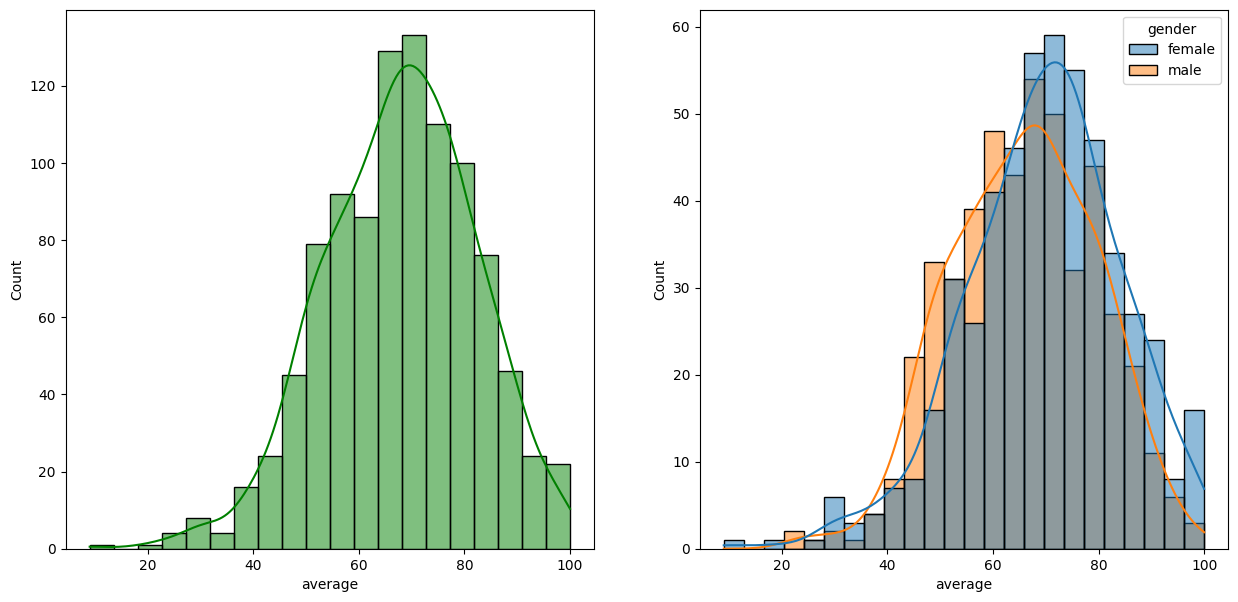

In [18]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=stu_data,x="average",bins=20,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=stu_data,x="average",kde=True,hue="gender")
plt.show()

female students tend to perform well than male students

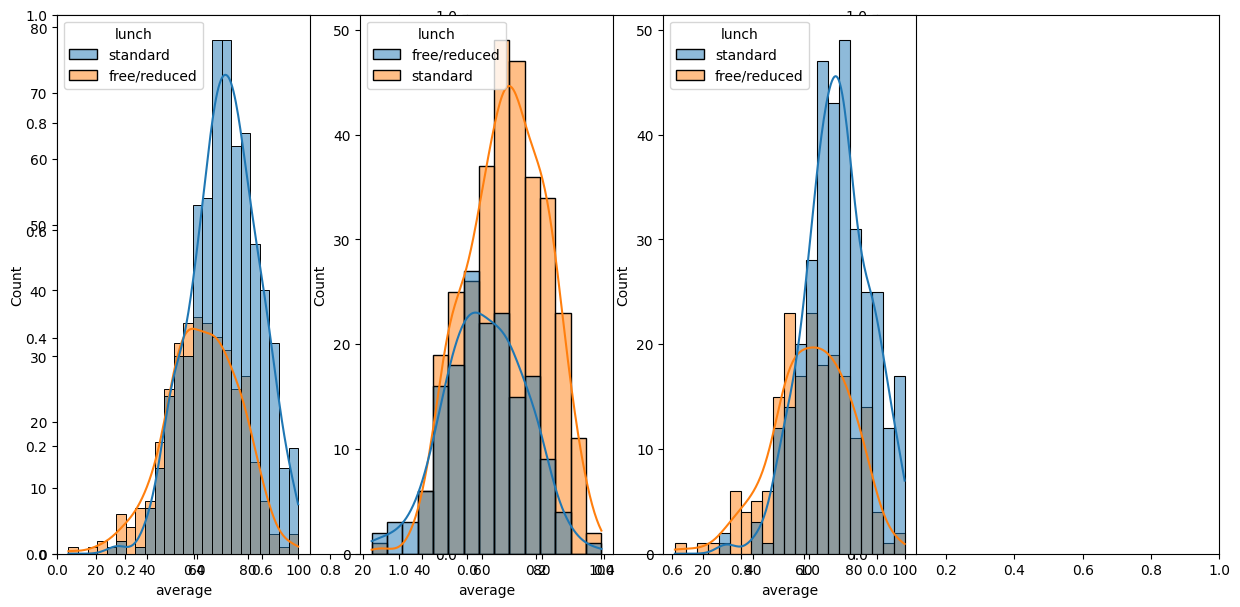

In [19]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=stu_data,x="average",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=stu_data[stu_data.gender=="male"],x="average",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=stu_data[stu_data.gender=="female"],x="average",kde=True,hue="lunch")
plt.show()

standard lunch helps to perform well in exams in both male and female

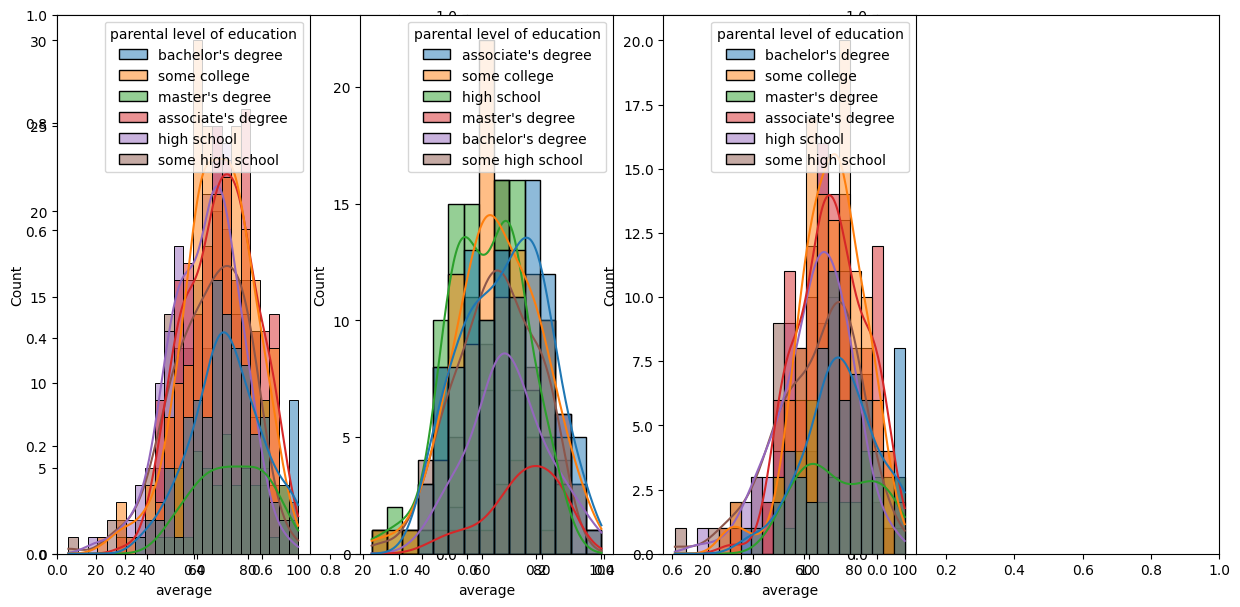

In [20]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=stu_data,x="average",kde=True,hue="parental level of education")
plt.subplot(142)
sns.histplot(data=stu_data[stu_data.gender=="male"],x="average",kde=True,hue="parental level of education")
plt.subplot(143)
sns.histplot(data=stu_data[stu_data.gender=="female"],x="average",kde=True,hue="parental level of education")
plt.show()

in 2nd plot shows that parents whose education is associate's degree or master's degree their male child perform well in the exam

Uni variate analysis

In [21]:
print(num_col)
print(cat_col)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


ploting histogram and blox plot for numerical columns

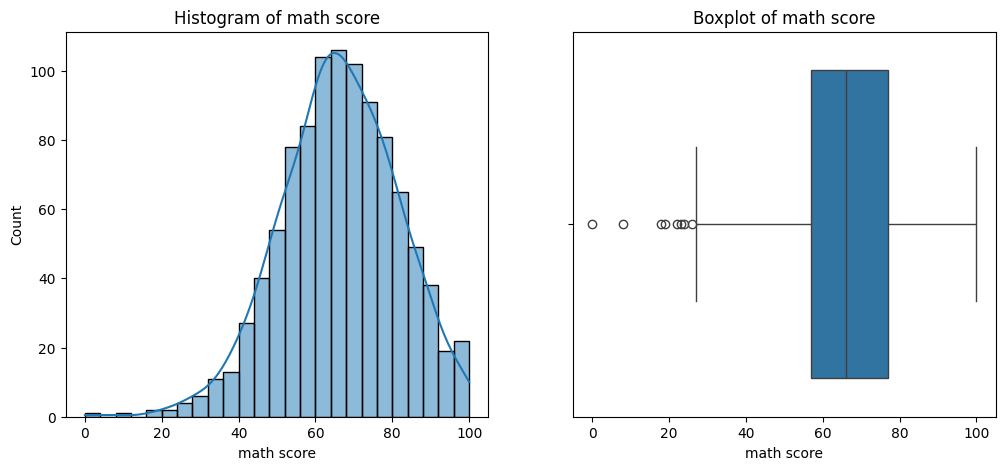

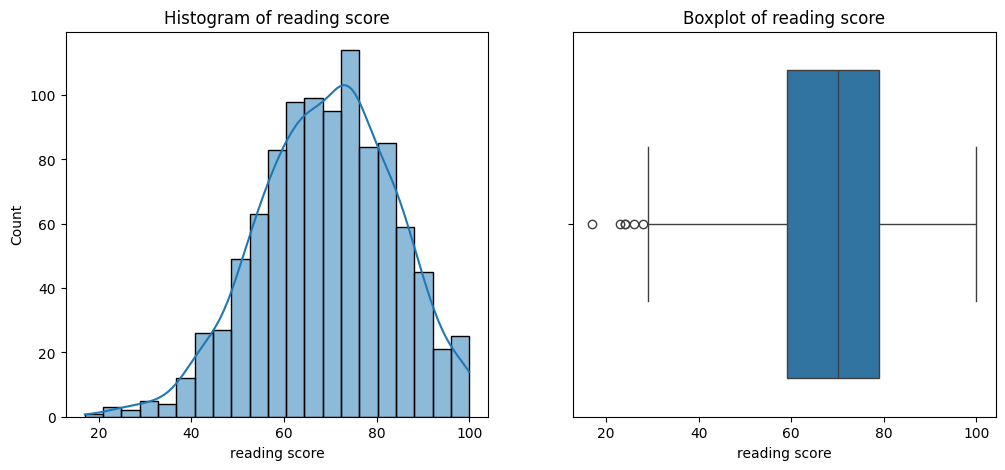

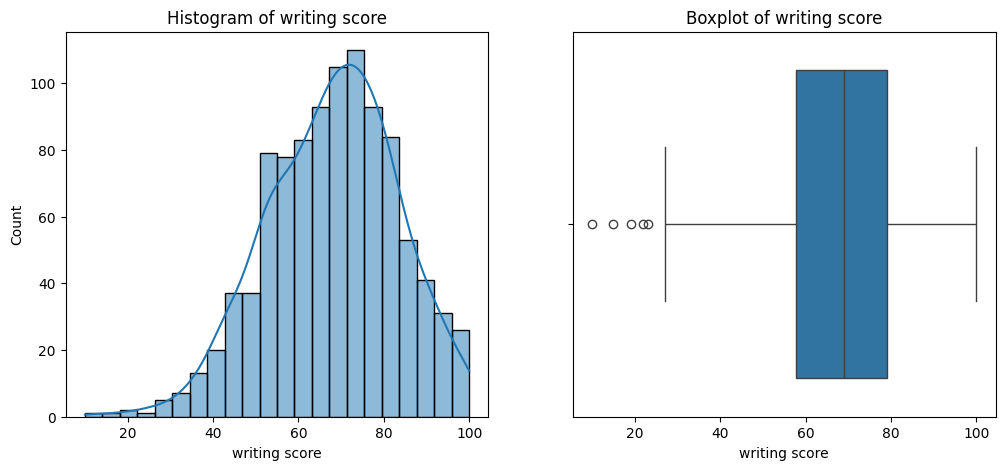

In [22]:
for col in num_col:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, data=stu_data, kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=stu_data)
    plt.title(f'Boxplot of {col}')

    plt.show()

we can observe there are outliers in the numerical data

Handling outliers using Z-SCORE

In [23]:
threshold = 3
z_scores = np.abs((stu_data[num_col] - stu_data[num_col].mean()) / stu_data[num_col].std())
stu_data_cleaned = stu_data[(z_scores < threshold).all(axis=1)]

print(f"Original dataset shape: {stu_data.shape}")
print(f"Dataset shape after removing outliers: {stu_data_cleaned.shape}")
print("total no of outliers in the data set is==>", stu_data.shape[0]-stu_data_cleaned.shape[0])

Original dataset shape: (1000, 10)
Dataset shape after removing outliers: (993, 10)
total no of outliers in the data set is==> 7


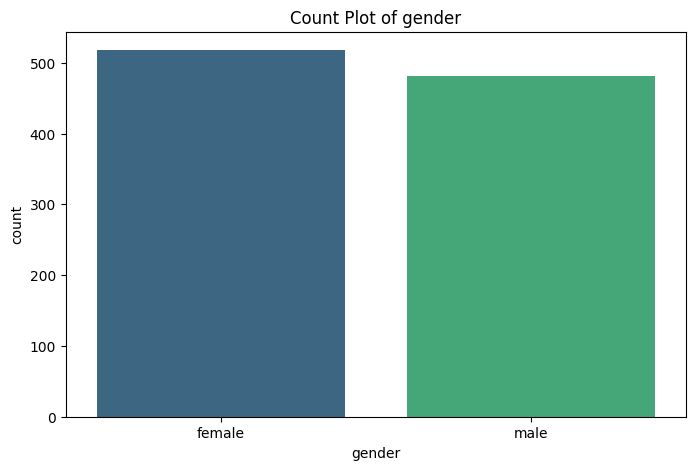

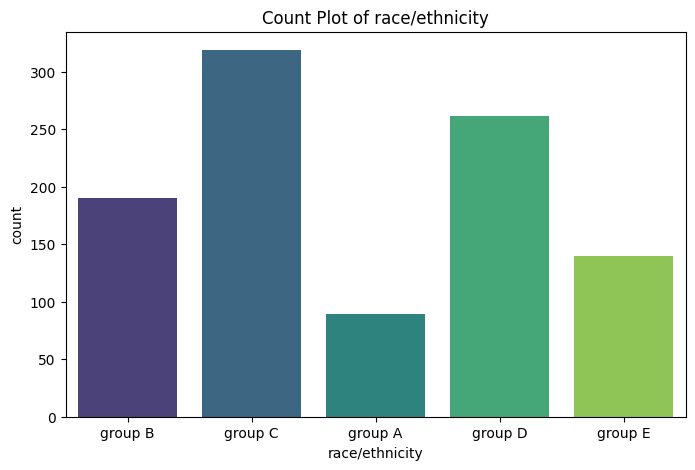

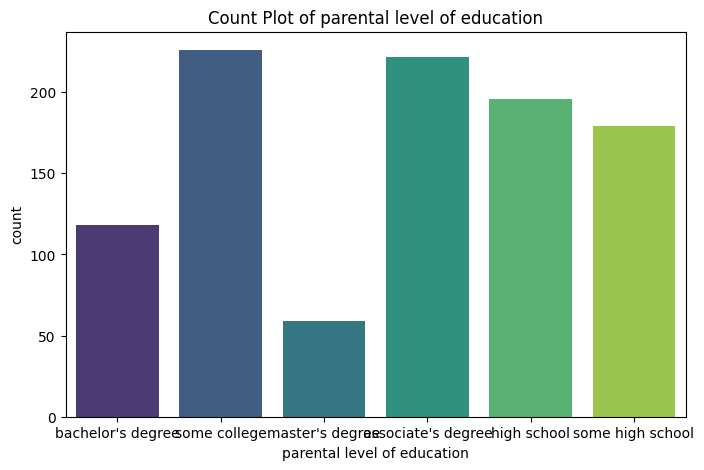

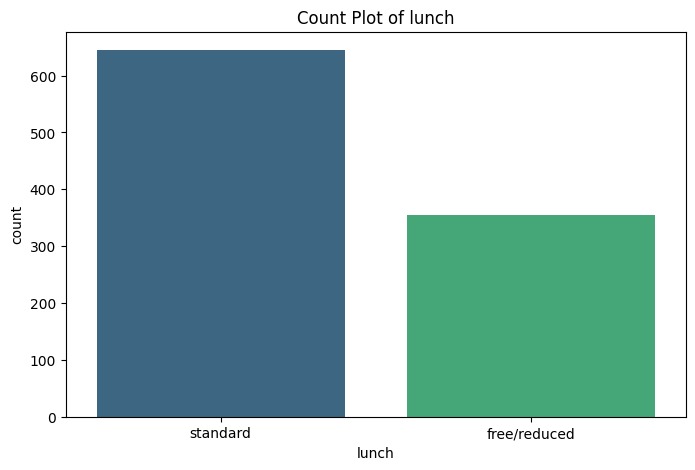

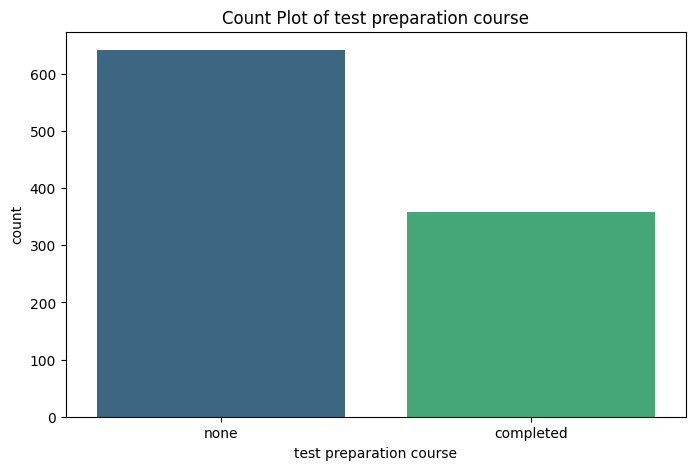

In [24]:
for col in cat_col:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=stu_data, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.show()

Multi variate Analysis

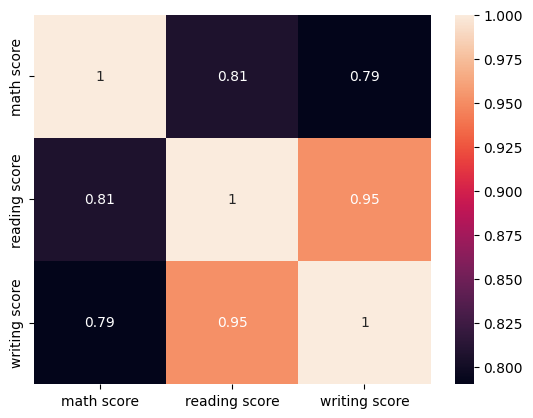

In [25]:
corr_matrix=stu_data_cleaned[num_col].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

all subjects are highly positive correlated

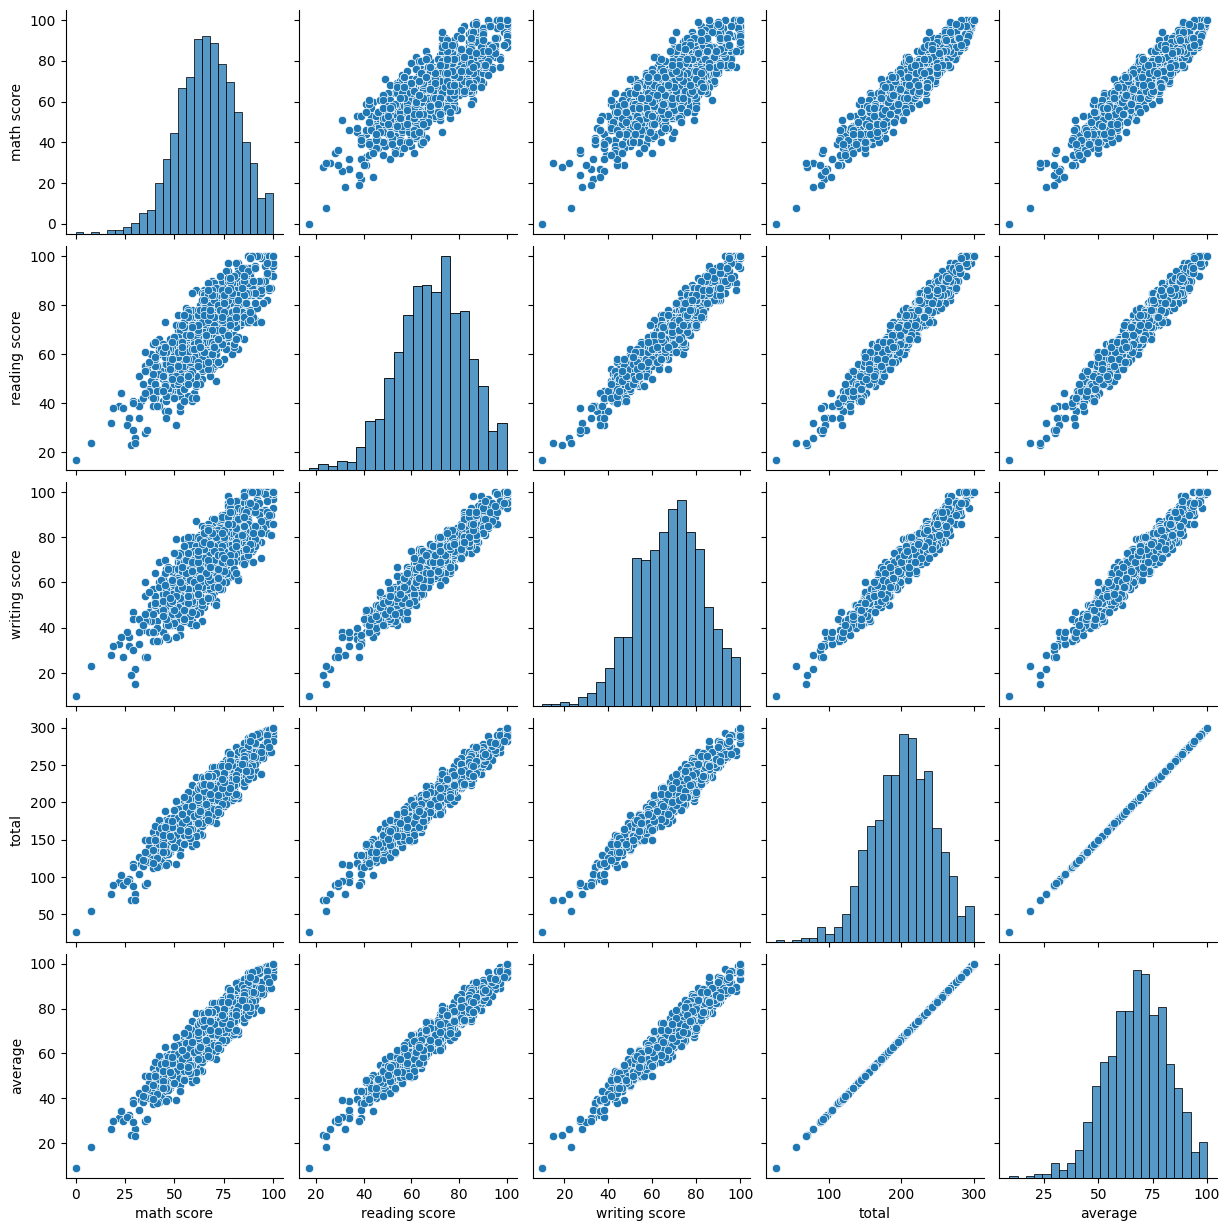

In [26]:
sns.pairplot(data=stu_data)
plt.show()

we can observe almost all the data is linear.